In [14]:
import os
import sys
import torch
import numpy as np
from glob import glob
import healpy as hp
import matplotlib.pyplot as plt

sys.path.append("/gpfs02/work/akira.tokiwa/gpgpu/Github/SR-SPHERE/")
from scripts.maploader.maploader import get_data_from_params, get_normalized_from_params
from scripts.utils.run_utils import set_params

In [3]:
base_dir = "/gpfs02/work/akira.tokiwa/gpgpu/Github/SR-SPHERE"
params = set_params(base_dir, model="diffusion", scheduler="linear", order=4, batch_size=4, n_maps=1)

In [4]:
lr, hr = get_data_from_params(params)
data_input, data_condition, transforms_lr, inverse_transform_lr, transforms_hr, inverse_transforms_hr, range_min_lr, range_max_lr, range_min_hr, range_max_hr = get_normalized_from_params(lr, hr, params)

LR data loaded from /gpfs02/work/akira.tokiwa/gpgpu/FastPM/healpix/nc128/.  Number of maps: 1
HR data loaded from /gpfs02/work/akira.tokiwa/gpgpu/FastPM/healpix/nc256/.  Number of maps: 1
data nside: 512, divided into 192 patches, each patch has 16384 pixels.
LR data normalized to [-1.0,1.0] by both transform.
HR data normalized to [-1.0,1.0] by both transform.


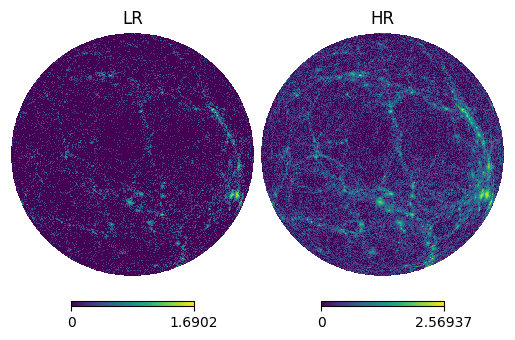

In [9]:
# data before normalization
plt.figure(figsize=(5, 5))
hp.orthview(np.hstack(lr[:192, :, 0].detach().cpu().numpy()), half_sky=True, title="LR", sub=(1, 2, 1), nest=True)
hp.orthview(np.hstack(hr[:192, :, 0].detach().cpu().numpy()), half_sky=True, title="HR", sub=(1, 2, 2), nest=True)
plt.show()

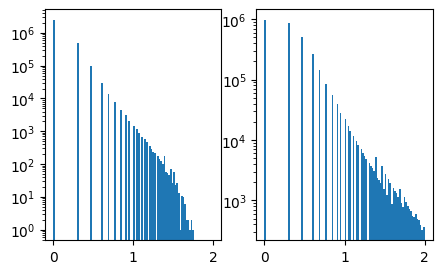

In [13]:
fig = plt.figure(figsize=(5, 3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(lr.detach().cpu().numpy().flatten(), bins=100, range=(0, 2))
ax2.hist(hr.detach().cpu().numpy().flatten(), bins=100, range=(0, 2))
ax1.set_yscale("log")
ax2.set_yscale("log")

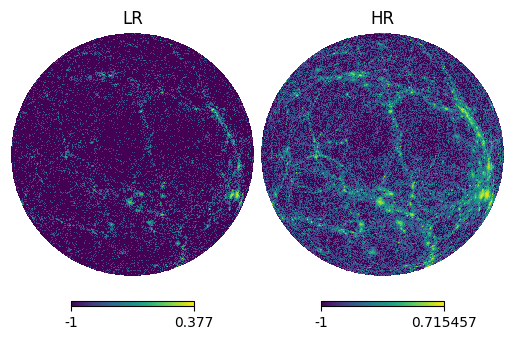

In [19]:
# data apllied sigmoid transformation
transed_lr = (torch.sigmoid(lr)-0.75)*4
transed_hr = (torch.sigmoid(hr)-0.75)*4

plt.figure(figsize=(5, 5))
hp.orthview(np.hstack(transed_lr[:192, :, 0].detach().cpu().numpy()), half_sky=True, title="LR", sub=(1, 2, 1), nest=True)
hp.orthview(np.hstack(transed_hr[:192, :, 0].detach().cpu().numpy()), half_sky=True, title="HR", sub=(1, 2, 2), nest=True)
plt.show()

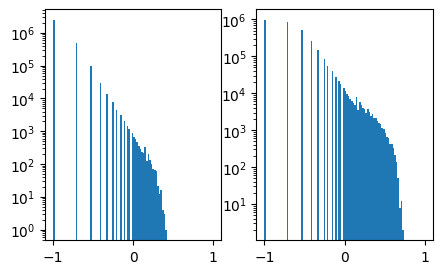

In [20]:
fig = plt.figure(figsize=(5, 3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(transed_lr.detach().cpu().numpy().flatten(), bins=100, range=(-1, 1))
ax2.hist(transed_hr.detach().cpu().numpy().flatten(), bins=100, range=(-1, 1))
ax1.set_yscale("log")
ax2.set_yscale("log")

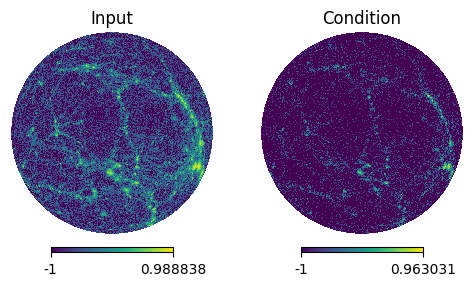

In [18]:
plt.figure(figsize=(5, 5))
hp.orthview(np.hstack(data_input[:192, :, 0].detach().cpu().numpy()), half_sky=True, title="Input", sub=(2, 2, 1), nest=True)
hp.orthview(np.hstack(data_condition[:192, :, 0].detach().cpu().numpy()), half_sky=True, title="Condition", sub=(2, 2, 2), nest=True)

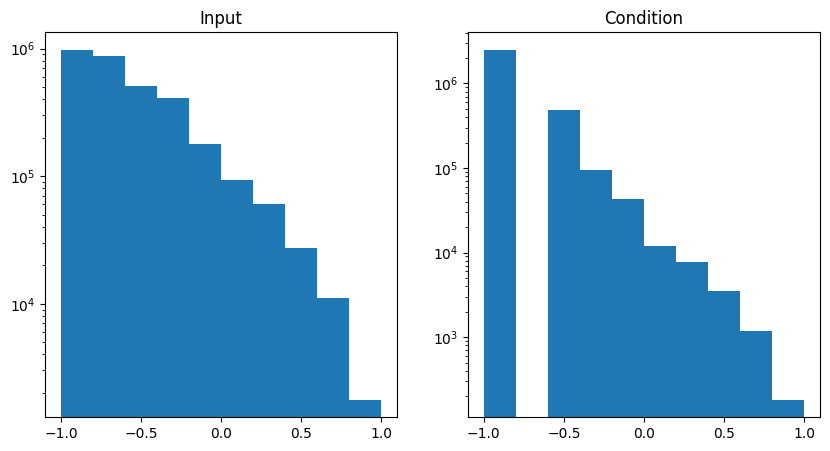

In [7]:
# plot the histogram of the input and condition
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(data_input.detach().cpu().numpy().flatten(), bins=10, range=(-1, 1))
ax2.hist(data_condition.detach().cpu().numpy().flatten(), bins=10, range=(-1, 1))
ax1.set_yscale("log")
ax2.set_yscale("log")
ax1.set_title("Input")
ax2.set_title("Condition")
plt.show()